# Task 0: Calcaute pred, eval, random, shuffled -- use 4 scripts

# Task 0: Calculate closest distance -- use 1 script

# Task 0: Combine 30 folds of closeset distance

In [24]:
import numpy as np

In [25]:
closest_dist_fold0 = []
for i in range(30): # <------------------------------------------------------------------------change
	closest_dist_fold0.append(np.load('validation_l8_anti/closest_dist_fold0_' + str(i) + '.npy', allow_pickle=True))
# combine 30 1-d arrays into 1 1-d array
closest_dist_fold0 = np.concatenate(closest_dist_fold0, axis=0)
print('hamming_dist_fold0.shape: ', closest_dist_fold0.shape)

hamming_dist_fold0.shape:  (307083,)


In [26]:
# save the 1-d array
np.save('validation_l8_anti/closest_dist_fold0.npy', closest_dist_fold0)

# Task 0: Combine 5 fold of predictions

In [28]:
import numpy as np

In [29]:
# load validation data
validation_dict = np.load('validation_l8_anti/validation_dict_fold0.npy', allow_pickle=True) # <------------------------------------------------------------------------change
validation_dict = validation_dict.tolist()
validation_list = []
for target, value_dict in validation_dict.items():
    for comp, count in value_dict.items():
        validation_list.append([target, comp, count])
validation_array = np.array(validation_list)

In [30]:
peptide_pred_list = []
for i in range(5): # <------------------------------------------------------------------------change
	peptide_pred_list.append(np.load('model_evaluation/peptide_pred_fold{}.npy'.format(i), allow_pickle=True))
peptide_pred = np.empty((np.sum([len(peptide_pred_list[i]) for i in range(5)]), 3), dtype=object)
for i in range(5): # <------------------------------------------------------------------------change
	peptide_pred[i::5] = peptide_pred_list[i]
print("Greedy minibatch prediction number: \n", len(peptide_pred))
print("Greedy minibatch prediction example data: \n", peptide_pred[:10])
correct = 0
for pred, truth in zip(peptide_pred[:, 1], validation_array[:, 1]):
	if pred == truth:
		correct += 1
print("Number of correct prediction: ", correct)
print("Number of total prediction: ", len(peptide_pred))
print("Greedy minibatch prediction accuracy: \n", correct / len(peptide_pred))
with open('model_evaluation/greedy_prediction.txt', 'w') as f:
	f.write("Greedy minibatch prediction number: \n {}\n".format(len(peptide_pred)))
	f.write("Greedy minibatch prediction example data: \n {}\n".format(peptide_pred[:10]))
	f.write("Number of correct prediction: {}\n".format(correct))
	f.write("Number of total prediction: {}\n".format(len(peptide_pred)))
	f.write("Greedy minibatch prediction accuracy: \n {}\n".format(correct / len(peptide_pred)))
# 1.1 save the prediction result
np.save('model_evaluation/peptide_pred.npy', peptide_pred)

peptide_eval_list = []
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_list.append(np.load('model_evaluation/peptide_eval_fold{}.npy'.format(i), allow_pickle=True))
peptide_eval = np.empty((np.sum([len(peptide_eval_list[i]) for i in range(5)]), 3), dtype=object)
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval[i::5] = peptide_eval_list[i]
print("minibatch evaluatiion number: \n", len(peptide_eval))
print("minibatch evaluatiion example data: \n", peptide_eval[:10])
y = peptide_eval[:, 2].astype(np.float32)
average_log_prob = np.mean(np.log(y))
median_prob = np.median(y)
print("Minibatch evaluatiion average log probability: \n", average_log_prob)
print("Minibatch evaluatiion median probability: \n", median_prob)
with open('model_evaluation/prob_evaluation.txt', 'w') as f:
	f.write("minibatch evaluatiion number: \n {}\n".format(len(peptide_eval)))
	f.write("minibatch evaluatiion example data: \n {}\n".format(peptide_eval[:10]))
	f.write("Minibatch evaluatiion average log probability: \n {}\n".format(average_log_prob))
	f.write("Minibatch evaluatiion median probability: \n {}\n".format(median_prob))
# 1.1 save the results
np.save('model_evaluation/peptide_eval.npy', peptide_eval)

peptide_eval_shuffled_list = []
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_shuffled_list.append(np.load('model_evaluation/peptide_eval_shuffled_fold{}.npy'.format(i), allow_pickle=True))
peptide_eval_shuffled = np.empty((np.sum([len(peptide_eval_shuffled_list[i]) for i in range(5)]), 3), dtype=object)
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_shuffled[i::5] = peptide_eval_shuffled_list[i]
print("minibatch evaluatiion number: \n", len(peptide_eval_shuffled))
print("minibatch evaluatiion example data: \n", peptide_eval_shuffled[:10])
y = peptide_eval_shuffled[:, 2].astype(np.float32)
average_log_prob = np.mean(np.log(y))
median_prob = np.median(y)
print("Minibatch evaluatiion average log probability: \n", average_log_prob)
print("Minibatch evaluatiion median probability: \n", median_prob)
with open('model_evaluation/prob_evaluation_shuffled.txt', 'w') as f:
	f.write("minibatch evaluatiion number: \n {}\n".format(len(peptide_eval_shuffled)))
	f.write("minibatch evaluatiion example data: \n {}\n".format(peptide_eval_shuffled[:10]))
	f.write("Minibatch evaluatiion average log probability: \n {}\n".format(average_log_prob))
	f.write("Minibatch evaluatiion median probability: \n {}\n".format(median_prob))
# 1.1 save the results
np.save('model_evaluation/peptide_eval_shuffled.npy', peptide_eval_shuffled)

peptide_eval_random_list = []
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_random_list.append(np.load('model_evaluation/peptide_eval_random_fold{}.npy'.format(i), allow_pickle=True))
peptide_eval_random = np.empty((np.sum([len(peptide_eval_random_list[i]) for i in range(5)]), 3), dtype=object)
for i in range(5): # <------------------------------------------------------------------------change
	peptide_eval_random[i::5] = peptide_eval_random_list[i]
print("minibatch evaluatiion number: \n", len(peptide_eval_random))
print("minibatch evaluatiion example data: \n", peptide_eval_random[:10])
y = peptide_eval_random[:, 2].astype(np.float32)
average_log_prob = np.mean(np.log(y))
median_prob = np.median(y)
print("Minibatch evaluatiion average log probability: \n", average_log_prob)
print("Minibatch evaluatiion median probability: \n", median_prob)
with open('model_evaluation/prob_evaluation_random.txt', 'w') as f:
	f.write("minibatch evaluatiion number: \n {}\n".format(len(peptide_eval_random)))
	f.write("minibatch evaluatiion example data: \n {}\n".format(peptide_eval_random[:10]))
	f.write("Minibatch evaluatiion average log probability: \n {}\n".format(average_log_prob))
	f.write("Minibatch evaluatiion median probability: \n {}\n".format(median_prob))
# 1.1 save the results
np.save('model_evaluation/peptide_eval_random.npy', peptide_eval_random)

Greedy minibatch prediction number: 
 307083
Greedy minibatch prediction example data: 
 [['RAVISFE' 'ETLIDIG' '0.00799332745373249']
 ['IGFSLLL' 'HVVSLAA' '0.2462368756532669']
 ['CKIKSIR' 'PEVVLQL' '0.046667665243148804']
 ['CAISCTG' 'DVAILGG' '0.07437065243721008']
 ['CAISCTG' 'DVAILGG' '0.07437065243721008']
 ['CAISCTG' 'DVAILGG' '0.07437065243721008']
 ['CAISCTG' 'DVAILGG' '0.07437065243721008']
 ['NLSCKVV' 'PFSVEEG' '0.022344321012496948']
 ['TSLFHAE' 'AFSATFG' '0.011406967416405678']
 ['VALMGVT' 'LSTIEIE' '0.25216028094291687']]
Number of correct prediction:  20644
Number of total prediction:  307083
Greedy minibatch prediction accuracy: 
 0.06722612453310668
minibatch evaluatiion number: 
 307083
minibatch evaluatiion example data: 
 [['RAVISFE' 'TLALDFW' '6.1704228393466565e-09']
 ['IGFSLLL' 'HVISLAA' '0.14960069954395294']
 ['CKIKSIR' 'PEVVLQL' '0.046667665243148804']
 ['CAISCTG' 'SVAILGA' '0.01304473914206028']
 ['CAISCTG' 'SVGIMGG' '1.7649388610152528e-05']
 ['CAISCTG' 'DIG

# Task 0: Load model

In [2]:
from TransformerBeta import *
import torch.nn as nn
import numpy as np
import os 
import matplotlib.pyplot as plt

In [3]:
# 0.1 load the model
model_path = "AF2_transformer_l12h768_validation_anti_l7_100ksteps_22Dec11_1202AM" # <------------------------------------------------------------------------change

query_size, key_size, value_size, num_hiddens = 512, 512, 512, 512
num_layers, dropout = 6, 0.1
lr, training_steps, batch_size, label_smoothing = 0.0004, 300000, 4096, 0.1
ffn_num_input, ffn_num_hiddens, num_heads = 512, 2048, 8

norm_shape = [512] # 512 corresponds to the dim of such number to normalize
device = d2l.try_gpu()

encoder_standard = TransformerEncoder(
	len(amino_dict), key_size, query_size, value_size, num_hiddens, 
	norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
	num_layers, dropout)
decoder_standard = TransformerDecoder(
	len(amino_dict), key_size, query_size, value_size, num_hiddens, 
	norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
	num_layers, dropout, shared_embedding=encoder_standard.embedding)
model_standard = EncoderDecoder(encoder_standard, decoder_standard)

model_standard_total_params = sum(p.numel() for p in model_standard.parameters())
model_standard_total_trainable_params = sum(p.numel() for p in model_standard.parameters() if p.requires_grad)

state_dict = torch.load(model_path,map_location=('cpu'))
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
	name = k[7:] #remove 'module'
	new_state_dict[name] = v

model_standard.load_state_dict(new_state_dict)

model_use = model_standard # <------------------------------------------------------------------------change
prediction_length = 8 # <------------------------------------------------------------------------change

# 0.2 create a txt file to record the results
if not os.path.exists('model_evaluation'):
	os.mkdir('model_evaluation')
print('Standard model: total number of parameters: {}'.format(model_standard_total_params))
print('Standard model: total number of trainable parameters: {}'.format(model_standard_total_trainable_params))

Standard model: total number of parameters: 198402072
Standard model: total number of trainable parameters: 198402072


# Task 1: embedding analysis

In [33]:
# extratc encoder embedding
encoder_amino_embedding = model_use.encoder.embedding
encoder_amino_embedding_weight = encoder_amino_embedding.weight.data.cpu().numpy()

# extract decoder embedding
decoder_amino_embedding = model_use.decoder.embedding
decoder_amino_embedding_weight = decoder_amino_embedding.weight.data.cpu().numpy()

# extract output layer
output_amino_embedding = model_use.decoder.dense
output_amino_embedding_weight = output_amino_embedding.weight.data.cpu().numpy()

print(encoder_amino_embedding_weight.shape)
print(decoder_amino_embedding_weight.shape)
print(output_amino_embedding_weight.shape)

from sklearn.preprocessing import StandardScaler

# standardize the embedding weights
encoder_amino_embedding_weight_standardized = StandardScaler().fit_transform(encoder_amino_embedding_weight)
decoder_amino_embedding_weight_standardized = StandardScaler().fit_transform(decoder_amino_embedding_weight)

(24, 768)
(24, 768)
(24, 768)


In [34]:
def plot_embeddings(M_reduced, amino_dict, amino_list, amino_property = None, remove_amino=[], text_bias = 0.05):

    from collections import OrderedDict

    for amino in amino_list:
        # if in remove_words, remove the word from the plot
        if amino in remove_amino:
            continue

        if amino_property != None:
            size, (type, color) = amino_property[amino]
            if (type, color) == ('x', 'blue'):
                label = 'aliphatic'
            elif (type, color) == ('s', 'blue'):
                label = 'sulfur'
            elif (type, color) == ('o', 'green'):
                label = 'aromatic'
            elif (type, color) == ('o', 'blue'):
                label = 'hydroxly'
            elif (type, color) == ('o', 'purple'):
                label = 'amide'
            elif (type, color) == ('s', 'red'):
                label = 'positive'
            elif (type, color) == ('x', 'red'):
                label = 'negative'
            elif (type, color) == ('o', 'orange'):
                label = 'unique'
            else:
                raise ValueError('Unknown amino property')
    
            x, y = M_reduced[amino_dict[amino]]
            # create scatter plot contain 2 labels in 2 legends
            plt.scatter(x, y, marker=type, color=color, s=size, label=label)
            plt.text(x+text_bias, y+text_bias, amino, fontsize=12)
            plt.legend()

        else:
            x, y = M_reduced[amino_dict[amino]]
            plt.scatter(x, y, marker='x', color='red', s=60)
            plt.text(x+text_bias, y+text_bias, amino, fontsize=12)

    if amino_property != None:
        # combine same labels
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        additional_labels = ['Small (<120 Da)', 'Medium (120-150 Da)', 'Large (>150 Da)']
        additional_handles = [plt.plot([], [], color="black", marker = 'o', ms=i*5, ls='')[0] for i in range(1, len(additional_labels)+1)]

        plt.legend(list(by_label.values()) + additional_handles, list(by_label.keys())+additional_labels, bbox_to_anchor =(1.275, 1), title='Amino acid property')
    
    # move the legend outside of the plot

amino_letters = list(amino_dict.keys())
amino_letters_removal = ['<bos>', '<eos>', '<pad>', '<unk>']

small_size = 40
medium_size = 120
large_size = 240

aliphatic = ('x', 'blue')
sulfur = ('s', 'blue')
aromatic = ('o', 'green')


hydroxly = ('o', 'blue')
amide = ('o', 'purple')
positive = ('s', 'red')
negative = ('x', 'red')

unique = ('o', 'orange')


amino_property = {
	'A': (small_size, aliphatic),
	'C': (medium_size, sulfur),
	'D': (medium_size, negative),
	'E': (medium_size, negative),
	'F': (large_size, aromatic),
	'G': (small_size, unique),
	'H': (large_size, positive),
	'I': (medium_size, aliphatic),
	'K': (medium_size, positive),
	'L': (medium_size, aliphatic),
	'M': (medium_size, sulfur),
	'N': (medium_size, amide),
	'P': (small_size, unique),
	'Q': (medium_size, amide),
	'R': (large_size, positive),
	'S': (small_size, hydroxly),
	'T': (small_size, hydroxly),
	'V': (small_size, aliphatic),
	'W': (large_size, aromatic),
	'Y': (large_size, aromatic)
}

/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


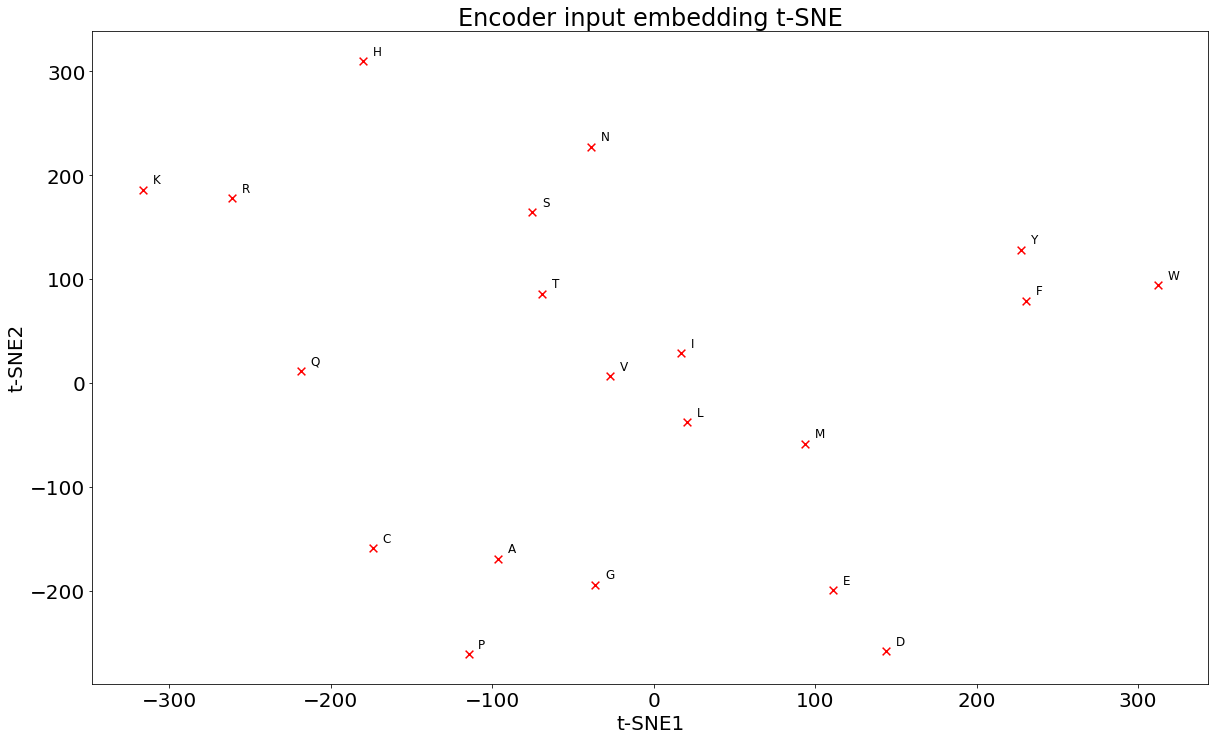

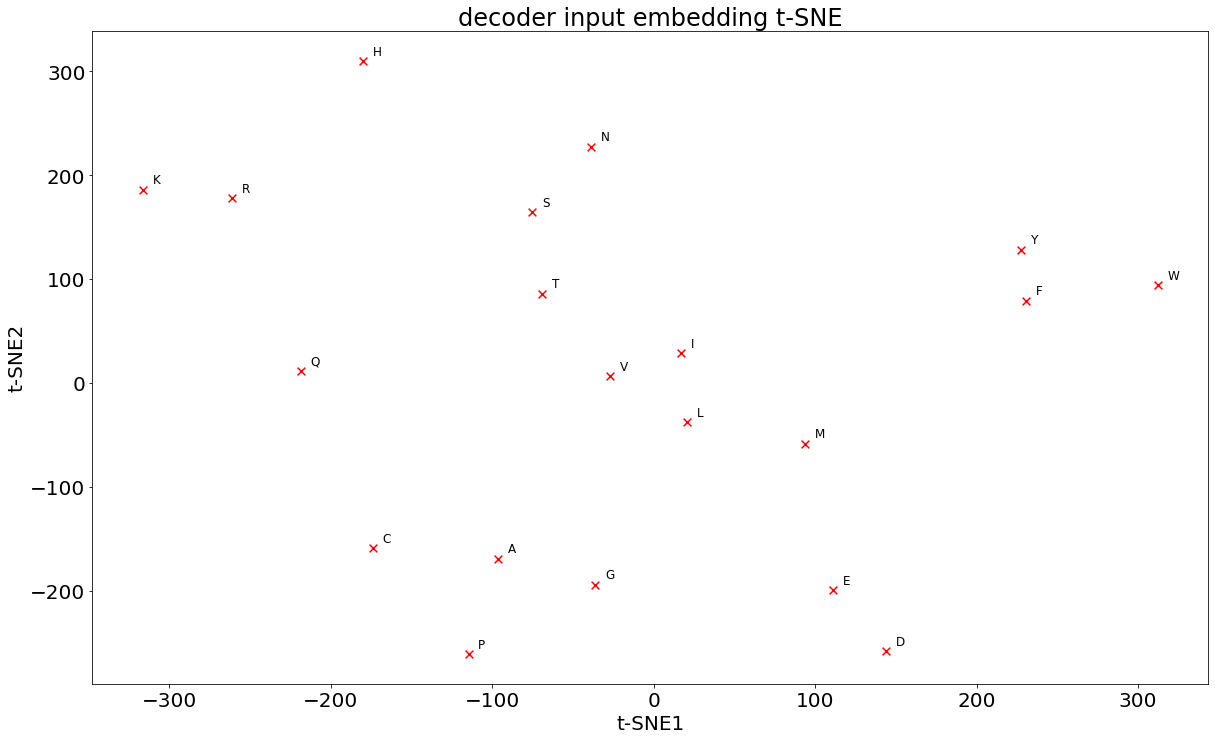

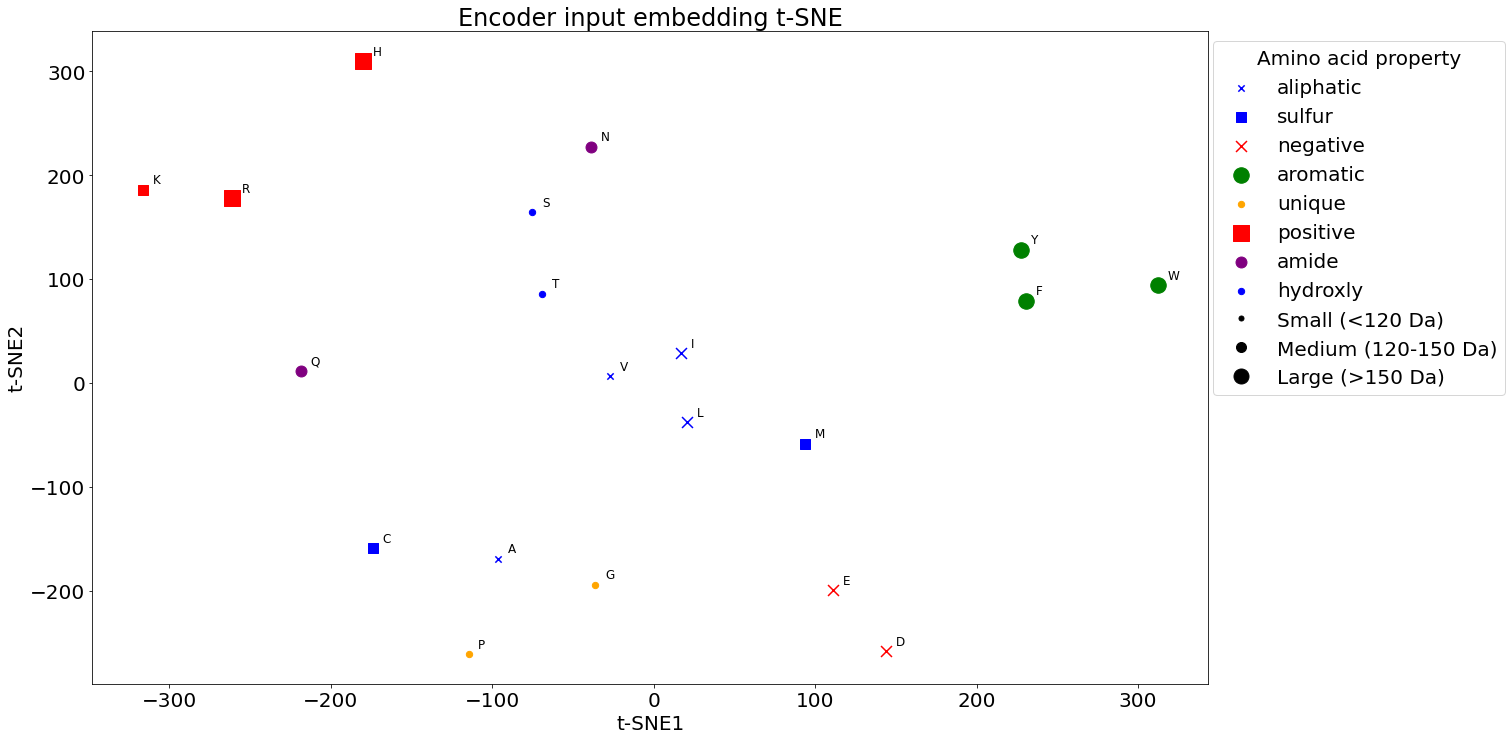

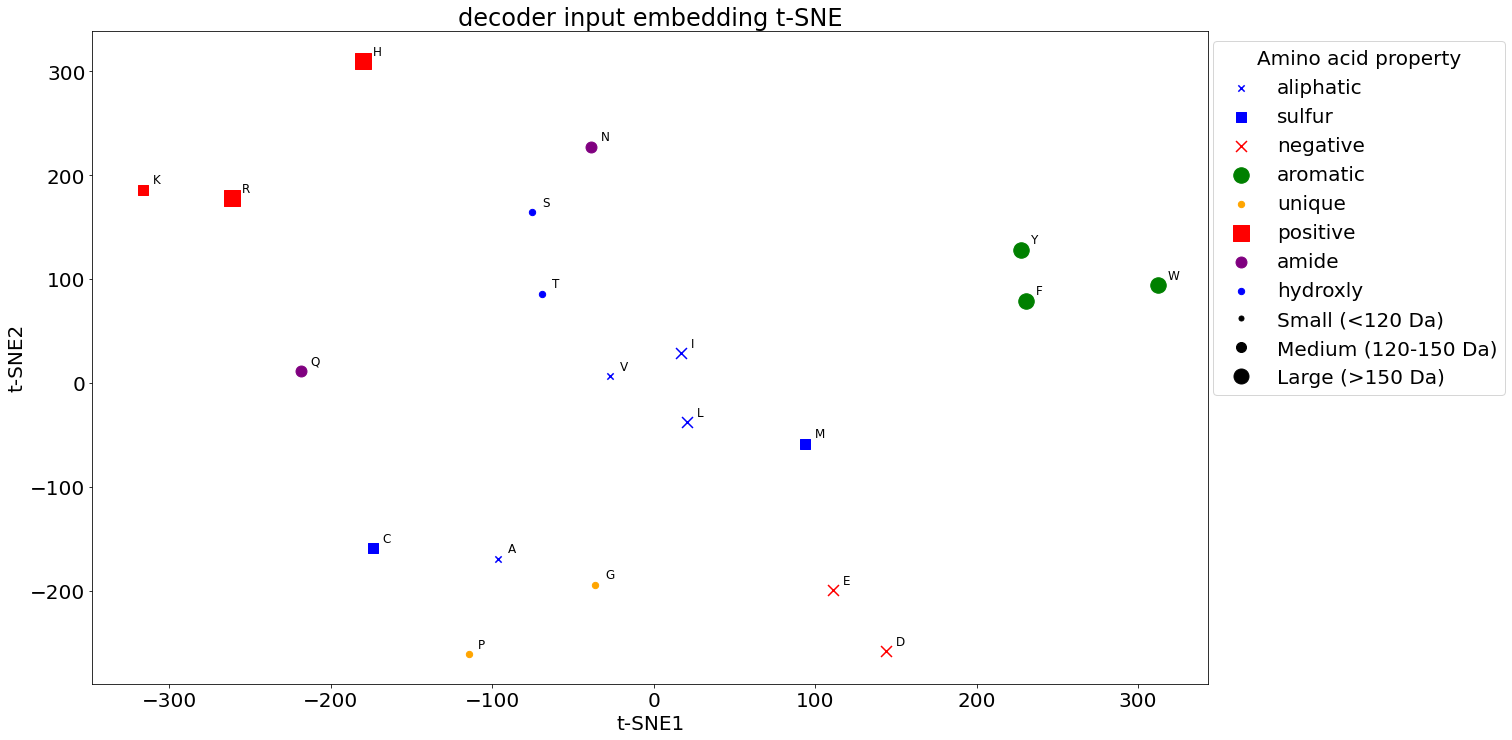

In [35]:
# perform t-SNE on the input embedding weights
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=3, n_iter=1000, random_state=4)
encoder_amino_embedding_weight_tsne = tsne.fit_transform(encoder_amino_embedding_weight_standardized)
decoder_amino_embedding_weight_tsne = tsne.fit_transform(decoder_amino_embedding_weight_standardized)

amino_letters = list(amino_dict.keys())
amino_letters_removal = ['<bos>', '<eos>', '<pad>', '<unk>']

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(encoder_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("Encoder input embedding t-SNE")
# save both plots
plt.savefig('model_evaluation/encoder_input_embedding_TSNE_no_label.png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(decoder_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("decoder input embedding t-SNE")
# save both plots
plt.savefig('model_evaluation/decoder_input_embedding_TSNE_no_label.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(encoder_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, amino_property=amino_property, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("Encoder input embedding t-SNE")
# save both plots
plt.savefig('model_evaluation/encoder_input_embedding_TSNE.png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(decoder_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, amino_property=amino_property, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("decoder input embedding t-SNE")
# save both plots
plt.savefig('model_evaluation/decoder_input_embedding_TSNE.png', bbox_inches='tight')
plt.show()

/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/rds/general/user/hz3519/home/anaconda3/envs/UROP_transformer/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


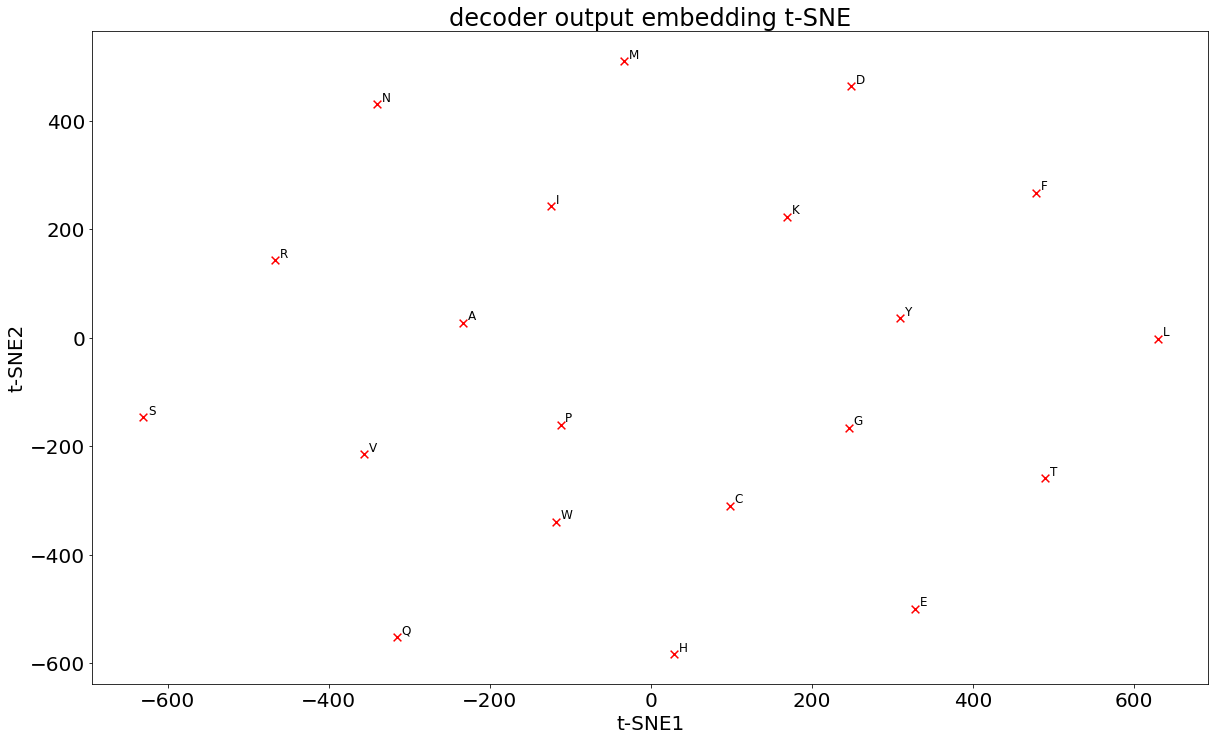

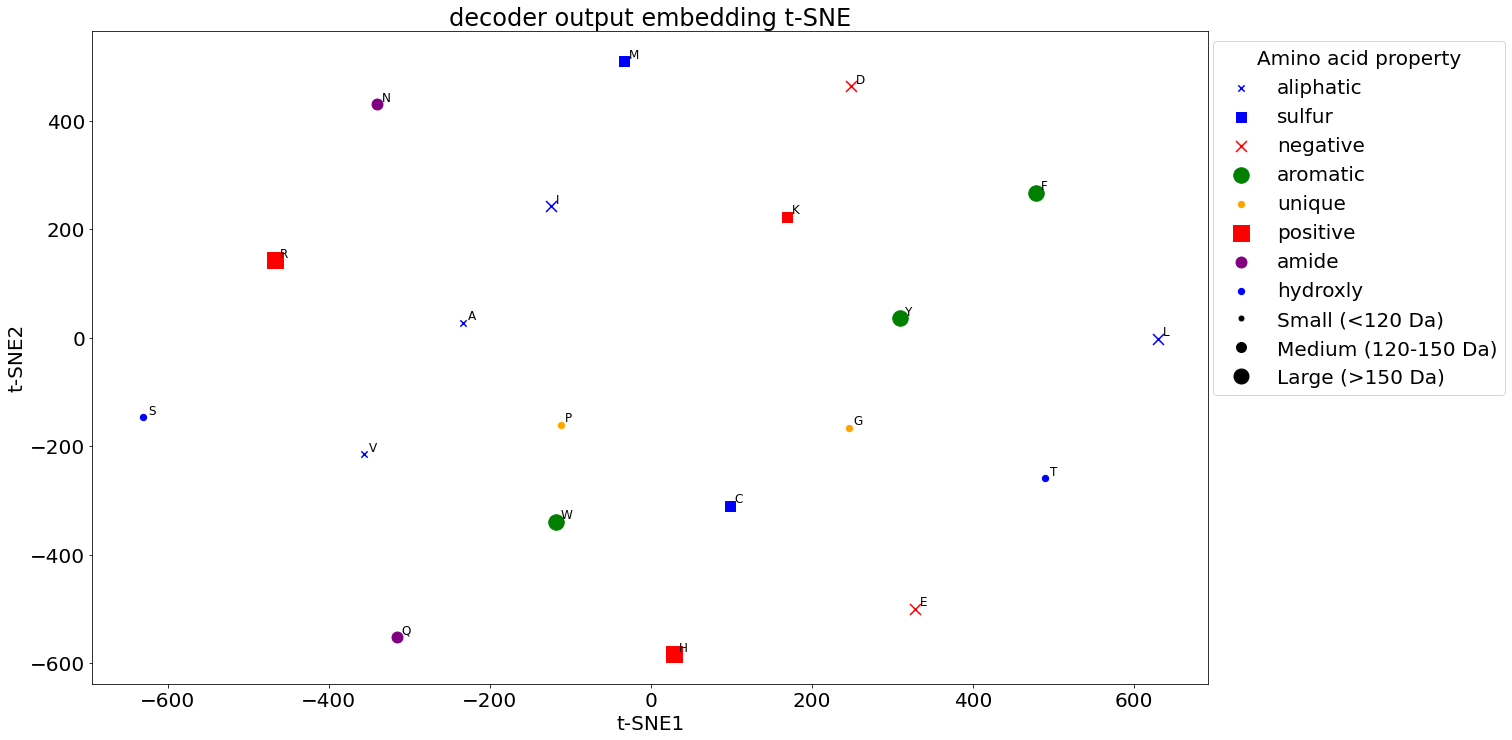

In [36]:
""" plot output embedding """
# perform t-SNE on the output embedding weights

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)
output_amino_embedding_weight_tsne = tsne.fit_transform(output_amino_embedding_weight)

amino_letters = list(amino_dict.keys())
amino_letters_removal = ['<bos>', '<eos>', '<pad>', '<unk>']

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(output_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("decoder output embedding t-SNE")
plt.savefig('model_evaluation/decoder_output_embedding_TSNE_no_label.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plot_embeddings(output_amino_embedding_weight_tsne, amino_dict, amino_letters, remove_amino=amino_letters_removal, amino_property=amino_property, text_bias=6)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("decoder output embedding t-SNE")
plt.savefig('model_evaluation/decoder_output_embedding_TSNE.png', bbox_inches='tight')
plt.show()

# Task 2: Probability vs count scatter plot

In [37]:
from TransformerBeta import *
import torch.nn as nn
import numpy as np
import os 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [38]:
# load validation data
validation_dict = np.load('validation_l8_anti/validation_dict_fold0.npy', allow_pickle=True) # <------------------------------------------------------------------------change
validation_dict = validation_dict.tolist()
validation_list = []
for target, value_dict in validation_dict.items():
    for comp, count in value_dict.items():
        validation_list.append([target, comp, count])
validation_array = np.array(validation_list)

In [39]:
# load evaluation data
peptide_eval = np.load('model_evaluation/peptide_eval.npy', allow_pickle=True) # <------------------------------------------------------------------------change
print(validation_array.shape)
print(peptide_eval.shape)

(307083, 3)
(307083, 3)


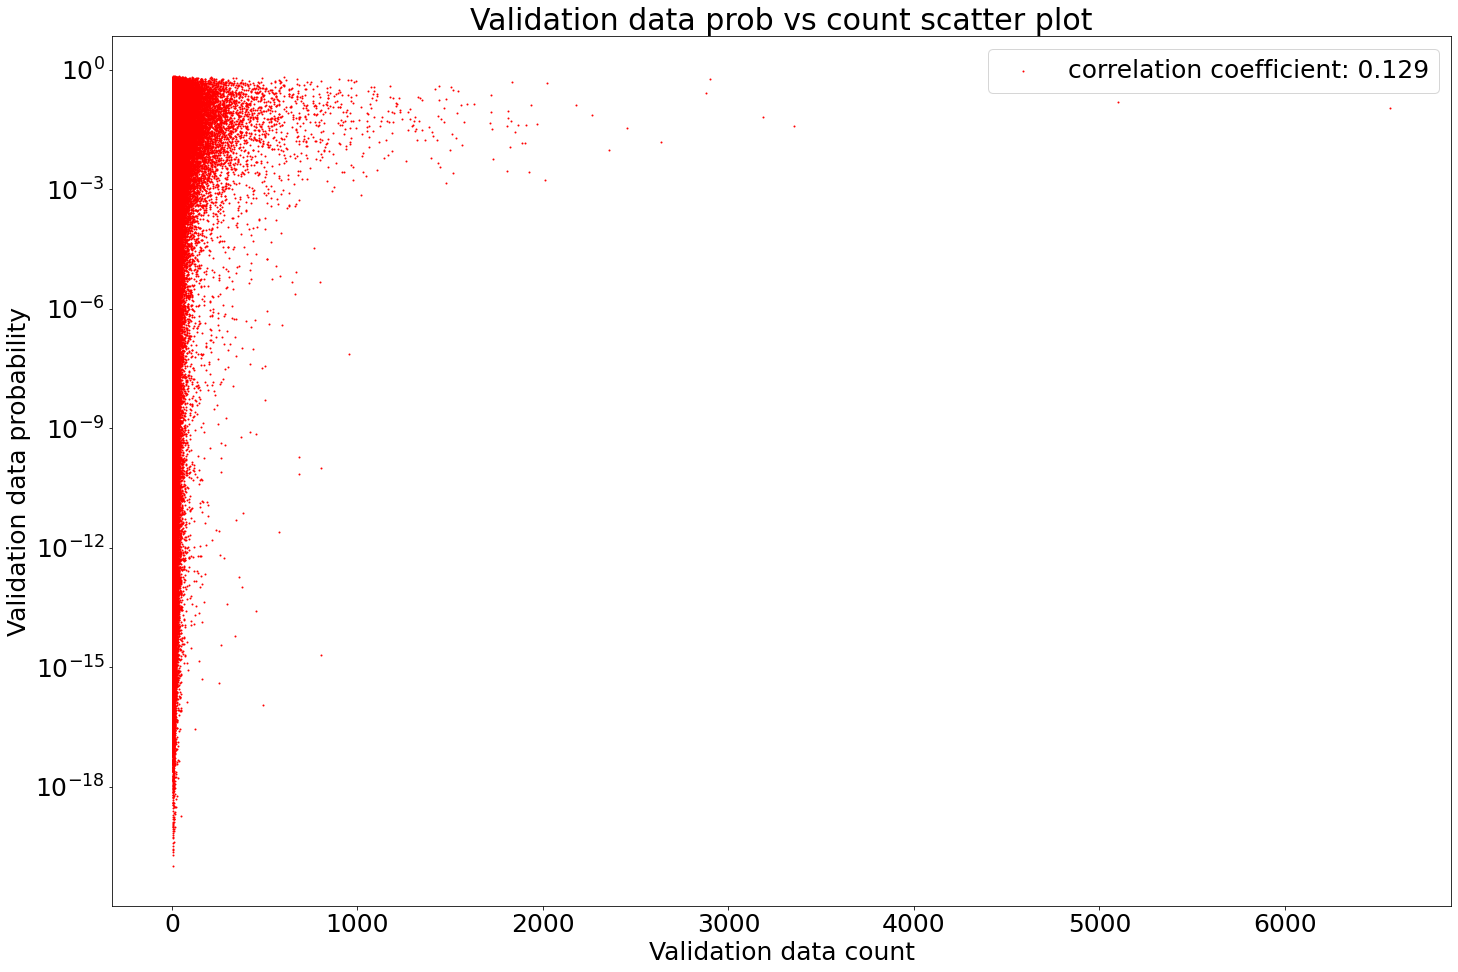

In [40]:
# probability vs count scatter plot
x = validation_array[:, 2].astype(np.float32)
y = peptide_eval[:, 2].astype(np.float32)
# calculate correlation coefficient
corr, _ = pearsonr(x, y)

plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
plt.scatter(x, y, c='r', s=1, label='correlation coefficient: %.3f' % corr)
plt.yscale("log")
plt.xlabel('Validation data count')
plt.ylabel('Validation data probability')
plt.legend()
plt.title('Validation data prob vs count scatter plot')
plt.savefig('model_evaluation/prob_vs_count_scatter_plot.png')
plt.show()

In [41]:
# calculate correlation coefficient
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.129


# Task 3: Probability distribution analysis

In [42]:
from TransformerBeta import *
import torch.nn as nn
import numpy as np
import os 
import matplotlib.pyplot as plt

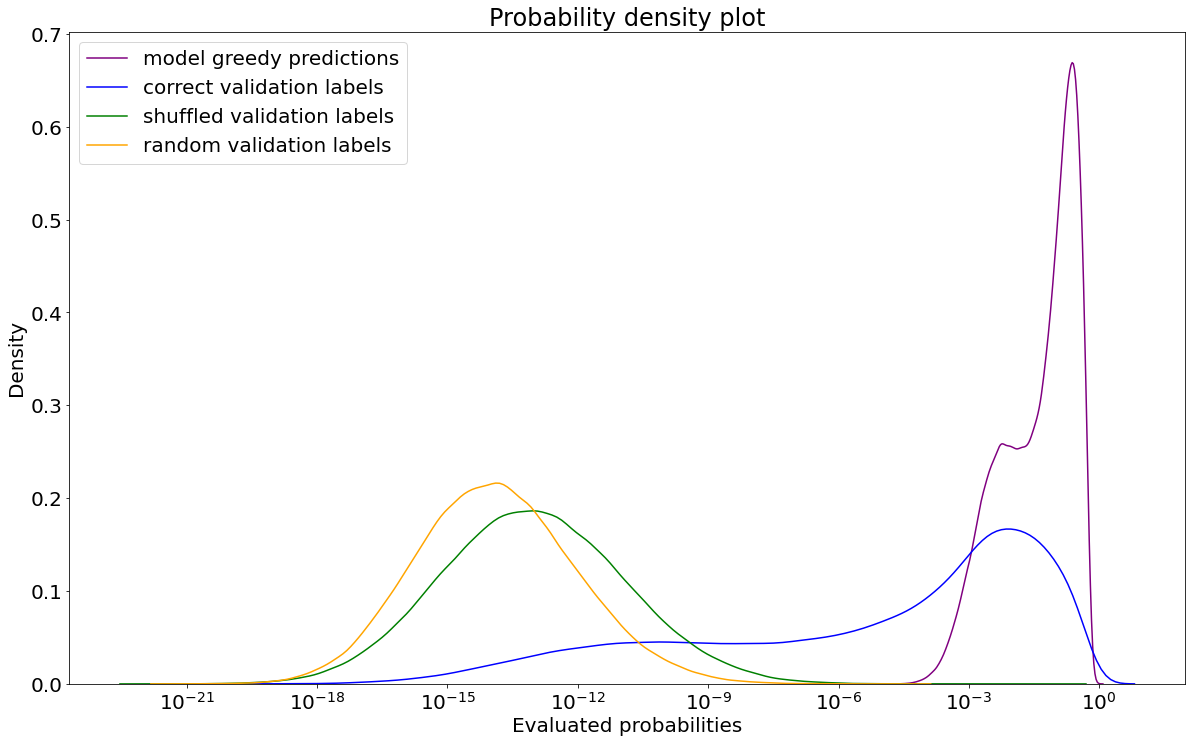

In [43]:
# 0 load the peptide eval and peptide pred
peptide_pred = np.load('model_evaluation/peptide_pred.npy', allow_pickle=True) # <------------------------------------------------------------------------change
peptide_eval = np.load('model_evaluation/peptide_eval.npy', allow_pickle=True) # <------------------------------------------------------------------------change
peptide_eval_shuffled = np.load('model_evaluation/peptide_eval_shuffled.npy', allow_pickle=True) # <------------------------------------------------------------------------change
peptide_eval_random = np.load('model_evaluation/peptide_eval_random.npy', allow_pickle=True) # <------------------------------------------------------------------------change



# 1. probability distribution analysis:
# probability of the model's generation of complementary peptides given the validation target peptides
# probability of the model's evaluation of the validation target peptides and the validation complementary peptides
# probability of the model's evaluation of the validation target peptides and the shuffled validation complementary peptides
# probability of the model's evaluation of the validation target peptides and truly random peptides

# 1.1 probability of the model's generation of complementary peptides given the validation target peptides
peptide_pred_prob= peptide_pred[:, 2].astype(np.float64)

# 1.2 probability of the model's evaluation of the validation target peptides and the validation complementary peptides
peptide_eval_prob = peptide_eval[:, 2].astype(np.float64)

# 1.3 probability of the model's evaluation of the validation target peptides and the shuffled validation complementary peptides
peptide_eval_shuffled_prob = peptide_eval_shuffled[:, 2].astype(np.float64)

# 1.4 probability of the model's evaluation of the validation target peptides and truly random peptides
peptide_eval_random_prob = peptide_eval_random[:, 2].astype(np.float64)

# 1.5 plot the probability distribution
import seaborn as sns

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
k0 = sns.kdeplot(peptide_pred_prob, log_scale=10, label= "model greedy predictions", c='purple')
k1 = sns.kdeplot(peptide_eval_prob, log_scale=10, label= "correct validation labels", c='blue')
k2 = sns.kdeplot(peptide_eval_shuffled_prob, log_scale=10, label= "shuffled validation labels", c='green')
k3 = sns.kdeplot(peptide_eval_random_prob, log_scale=10, label= "random validation labels", c = 'orange')

plt.xlabel('Evaluated probabilities')
plt.legend()
plt.title('Probability density plot')
plt.savefig('model_evaluation/evaluated_density_plot.png')
plt.show()

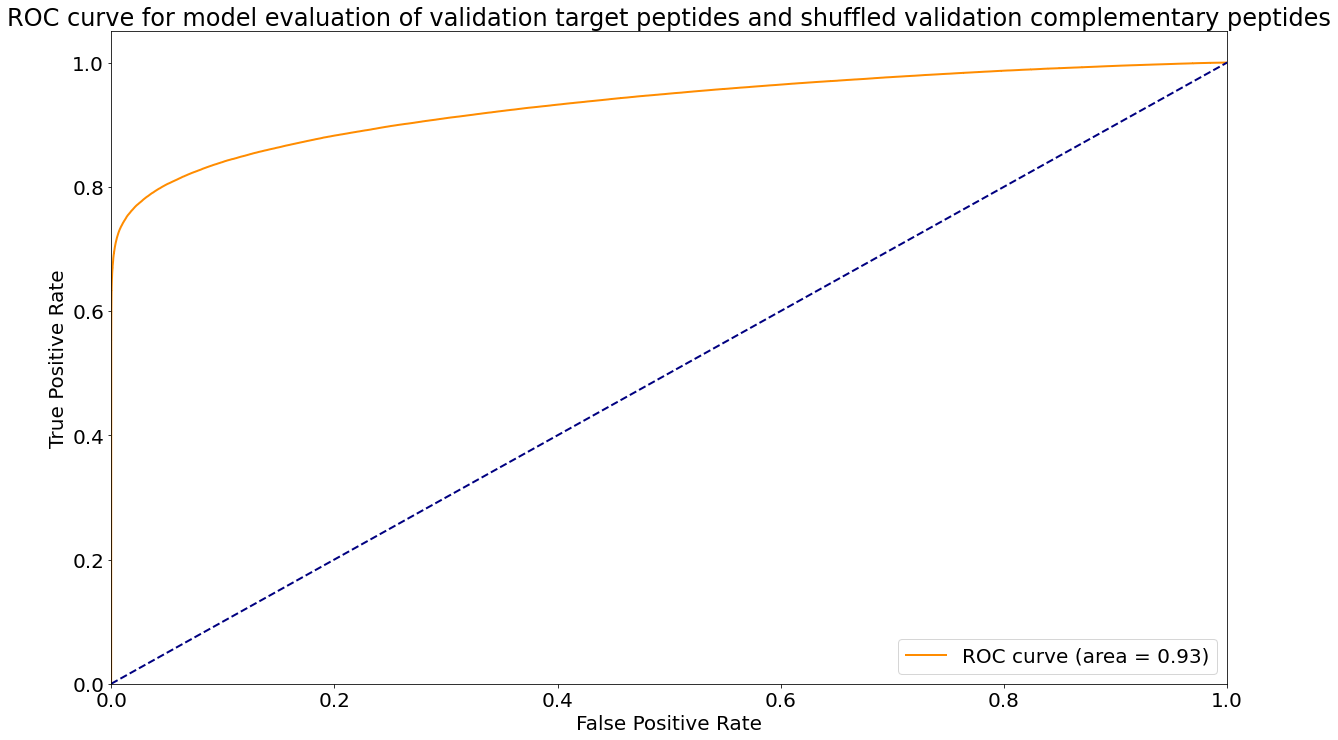

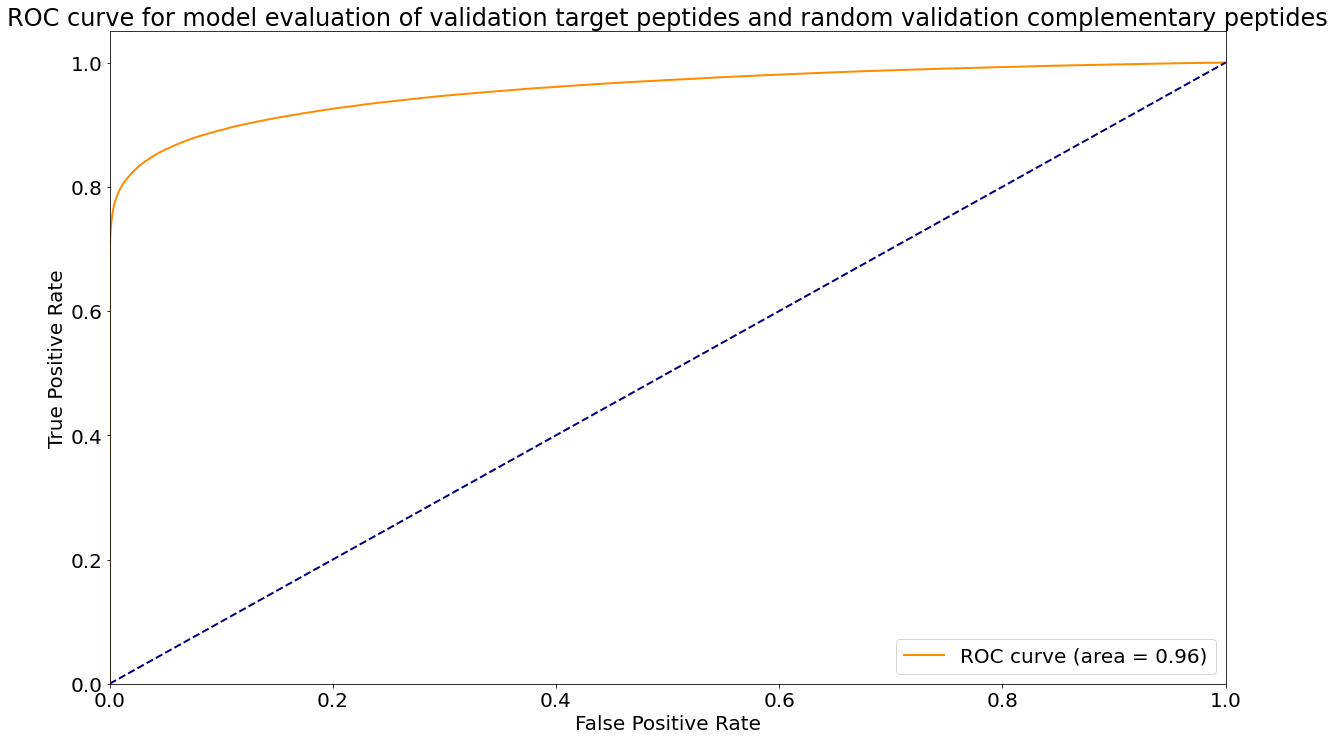

AUC for model evaluation of validation target peptides and shuffled validation complementary peptides:  0.9315094418896103
AUC for model evaluation of validation target peptides and random validation complementary peptides:  0.956164342208153


In [44]:
# 2. 
# task1: calculate ROC and AUC for model's evaluation of the validation target peptides and the validation complementary peptides and the shuffled validation complementary peptides
# task2: calculate ROC and AUC for model's evaluation of the validation target peptides and the validation complementary peptides and the truly random peptides

from sklearn.metrics import roc_curve, auc

# 2.1 ROC and AUC for model's evaluation of the validation target peptides and the validation complementary peptides and the shuffled validation complementary peptides
y_true = np.concatenate((np.ones(peptide_eval_prob.shape[0]), np.zeros(peptide_eval_shuffled_prob.shape[0])))
y_score = np.concatenate((peptide_eval_prob, peptide_eval_shuffled_prob))
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc_shuffled = auc(fpr, tpr)

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_shuffled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for model evaluation of validation target peptides and shuffled validation complementary peptides')
plt.legend(loc="lower right")
plt.savefig('model_evaluation/ROC_curve_shuffled.png')
plt.show()

# 2.2 ROC and AUC for model's evaluation of the validation target peptides and the validation complementary peptides and the truly random peptides
y_true = np.concatenate((np.ones(peptide_eval_prob.shape[0]), np.zeros(peptide_eval_random_prob.shape[0])))
y_score = np.concatenate((peptide_eval_prob, peptide_eval_random_prob))
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc_random = auc(fpr, tpr)

plt.figure(figsize=(20, 12), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 20})
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_random)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for model evaluation of validation target peptides and random validation complementary peptides')
plt.legend(loc="lower right")
plt.savefig('model_evaluation/ROC_curve_random.png')
plt.show()

# print the AUC
print('AUC for model evaluation of validation target peptides and shuffled validation complementary peptides: ', roc_auc_shuffled)
print('AUC for model evaluation of validation target peptides and random validation complementary peptides: ', roc_auc_random)


# Task 4: Attention analysis

In [21]:
# load training data
train_dict = np.load('train_l8_anti/train_dict_fold0.npy', allow_pickle=True)
train_dict = train_dict.tolist()
train_list = []
for target, value_dict in train_dict.items():
    for comp, count in value_dict.items():
        train_list.append([target, comp, count])
train_array = np.array(train_list)

In [4]:
# load validation data
validation_dict = np.load('validation_l8_anti/validation_dict_fold0.npy', allow_pickle=True) # <------------------------------------------------------------------------change
validation_dict = validation_dict.tolist()
validation_list = []
for target, value_dict in validation_dict.items():
    for comp, count in value_dict.items():
        validation_list.append([target, comp, count])
validation_array = np.array(validation_list)

In [5]:
# extract a subset of validation data
# print out some samples
num_seq = 1000
count_max = 10000
count_min = 1000

validation_top_count = []
for data in validation_array:
    if int(data[2]) <= count_max and int(data[2]) >= count_min:
        validation_top_count.append(data)
    if len(validation_top_count) > num_seq:
        break
validation_top_count = np.array(validation_top_count[:num_seq])   
print(len(validation_top_count))
print(validation_top_count[:40])

135
[['EFYFIEM' 'EYLFEFT' '3356']
 ['ILFGPFA' 'TVLFSGG' '1127']
 ['GWGLVRA' 'AEFRLVL' '1826']
 ['RVGVYLD' 'EVEWYCR' '1133']
 ['YQVSIHE' 'GKMVLLH' '1073']
 ['RELGVIN' 'PACNYYF' '1044']
 ['ATVVFLD' 'QIIVGMP' '1540']
 ['QRRIPVQ' 'KLPIYTS' '1852']
 ['RQVYLGG' 'DWLHAEY' '1176']
 ['TKGVYVS' 'TAYGGVV' '1228']
 ['KSRGCYE' 'NEVLDLR' '1086']
 ['GRVLLRP' 'AEVMVRV' '1297']
 ['IEFEVYI' 'SRQSFAF' '1719']
 ['PLVEIVT' 'EEMHARE' '1437']
 ['TEVAVIS' 'ISQATVI' '1028']
 ['VAVRSSA' 'RQVGASL' '2013']
 ['ALRVELF' 'FLSLREV' '1404']
 ['VVTVMAG' 'VTITLTF' '1198']
 ['VVFADWL' 'DLIVLLG' '1153']
 ['MDFKVTG' 'IDMQCAT' '1531']
 ['IEVTFDI' 'DKAGVHL' '1477']
 ['VNLRPVR' 'ERVVYFD' '1188']
 ['AFSYICR' 'MFCHCIW' '1023']
 ['IDDLIVY' 'LMGSYLA' '1164']
 ['DFVVVRE' 'KSPRLNV' '1514']
 ['VRAWTVR' 'ATFYTQL' '1059']
 ['YLNLVLD' 'LVKKIAV' '1438']
 ['RLYFVME' 'KLIKIAY' '1866']
 ['ERIEVIR' 'TIINVVG' '1889']
 ['MDFKVAG' 'IDMQLAS' '1809']
 ['SLTLVFE' 'RIEKLAV' '2359']
 ['ATVEQGA' 'LKVRVAP' '1591']
 ['VKTTVFV' 'AIAEIEI' '1334']
 ['YRR

#### Target of selection

In [58]:
task_target = 'EFYFIEME'
model_use = model_standard
prediction_length = 8

#### Search training database

In [59]:
# dataset search
print("Dataset search result: \n", search_target(train_array, task_target))

Dataset search result: 
 [['EFYFIEM' 'EFLFEFT' '1561']
 ['EFYFIEM' 'EYLFEIT' '1792']
 ['EFYFIEM' 'EWLFEIT' '489']
 ['EFYFIEM' 'QYLFEMT' '22']
 ['EFYFIEM' 'EYLFELT' '26']
 ['EFYFIEM' 'EYLFEVT' '271']
 ['EFYFIEM' 'QFLFELT' '9']
 ['EFYFIEM' 'EWLFEVT' '7']
 ['EFYFIEM' 'EYLYEFT' '8']
 ['EFYFIEM' 'DFLYELT' '110']
 ['EFYFIEM' 'DYLYEIT' '7']
 ['EFYFIEM' 'DVLFELT' '10']
 ['EFYFIEM' 'EVLFEVT' '6']
 ['EFYFIEM' 'EYLYEVT' '12']
 ['EFYFIEM' 'DYLFEFT' '8']
 ['EFYFIEM' 'DYLFEVT' '6']
 ['EFYFIEM' 'EFLFELT' '13']
 ['EFYFIEM' 'QYLFELT' '9']
 ['EFYFIEM' 'EYLFEMT' '6']]


#### Greedy single prediction

In [60]:
dec_comple_peptide_pred, dec_prob, dec_attention_weight_seq = predict_greedy_single(model_use, task_target, amino_dict, prediction_length + 2, device, save_attention_weights=True, print_info=True)

Conditional probability at position 1 is 0.5354633927345276
Conditional probability at position 2 is 0.5280604362487793
Conditional probability at position 3 is 0.9441679120063782
Conditional probability at position 4 is 0.7903116345405579
Conditional probability at position 5 is 0.9426621198654175
Conditional probability at position 6 is 0.2747837007045746
Conditional probability at position 7 is 0.9363229274749756
Conditional probability at position 8 is 0.9221352338790894
Input target sequence is EFYFIEM, predicted complementary peptide is EYLFELT
Condition on input, predicted probability is 0.04718764741586377


#### Candidates sampling

In [61]:
num_candidates = 100
max_iter = 20

peptide_candidates = sample_candidates(model_use, task_target, num_candidates, amino_dict, prediction_length + 2, device, max_iter=max_iter)
print(peptide_candidates)

number of total candidates sampled: 200
number of unique top candidates successfully sampled: 100
[['EYLFELT' '0.04718761891126633']
 ['EYLFEFT' '0.03788807988166809']
 ['EYLFEIT' '0.03477483242750168']
 ['EWLFEIT' '0.03445371240377426']
 ['EFLFEFT' '0.02593417651951313']
 ['QYLFELT' '0.024695422500371933']
 ['EYLFEVT' '0.020705625414848328']
 ['DYLYELT' '0.015689140185713768']
 ['QYLFEFT' '0.015589785762131214']
 ['DFLYELT' '0.01506178081035614']
 ['EFLFELT' '0.011352647095918655']
 ['EVLFEVT' '0.010640946216881275']
 ['EYLYELT' '0.0098868478089571']
 ['EYLFEMT' '0.009846213273704052']
 ['EWLFEVT' '0.007298340555280447']
 ['DVLFEVT' '0.006970047019422054']
 ['DYLFEVT' '0.005569422151893377']
 ['DYLFEIT' '0.005473441909998655']
 ['DFLFELT' '0.005439465865492821']
 ['EWLFELT' '0.004743983503431082']
 ['QFLFEFT' '0.004645318258553743']
 ['QYLFEIT' '0.004565594717860222']
 ['DYLYEVT' '0.004549855832010508']
 ['EFLFEIT' '0.004332159645855427']
 ['EFLFEVT' '0.0035051400773227215']
 ['DVLFEL

#### Peptides pair evaluation

In [62]:
task_target = task_target
dec_comple_peptide_pred = 'EYLFEFTE'

dec_prob, dec_attention_weight_seq = evaluate_single(model_use, task_target, dec_comple_peptide_pred,amino_dict, prediction_length + 2, device, save_attention_weights=True, print_info=True)

Conditional probability at position 1 is 0.5354633927345276
Conditional probability at position 2 is 0.5280604362487793
Conditional probability at position 3 is 0.9441679120063782
Conditional probability at position 4 is 0.7903116345405579
Conditional probability at position 5 is 0.9426621198654175
Conditional probability at position 6 is 0.22252120077610016
Conditional probability at position 7 is 0.9283279180526733
Conditional probability at position 8 is 0.9221741557121277
Input target sequence is EFYFIEM, complementary peptide is EYLFEFT
Evaluated probability is 0.03788810081328915


#### Visualize attention

In [63]:
# attention weights preprocessing

encoder_self_attention_raw = [torch.unsqueeze(attention, dim=0) for attention in model_use.encoder.attention_weights]
decoder_self_attention_raw = [torch.unsqueeze(attention, dim=0) for attention in dec_attention_weight_seq[-1][0]]
decoder_encoder_attention_raw = [torch.unsqueeze(attention, dim=0) for attention in dec_attention_weight_seq[-1][1]]

encoder_self_attention = [torch.tensor(np.delete(np.delete(layer_attention.detach().numpy(), [-2, -1], 3), [-2, -1], 2)) for layer_attention in encoder_self_attention_raw]
decoder_self_attention = [torch.tensor(np.delete(np.delete(layer_attention.detach().numpy(), -1, 3), -1, 2)) for layer_attention in decoder_self_attention_raw]
decoder_encoder_attention = [torch.tensor(np.delete(np.delete(layer_attention.detach().numpy(), [-2, -1], 3), -1, 2)) for layer_attention in decoder_encoder_attention_raw]
print(encoder_self_attention[0].shape)
print(decoder_self_attention[0].shape)
print(decoder_encoder_attention[0].shape)

# encoder_text = d2l.truncate_pad(list(task_target) + ['<eos>'], prediction_length+2, '<pad>')
# decoder_text = ['<bos>'] + list(dec_comple_peptide_pred)

encoder_text = list(task_target)
decoder_text = list(dec_comple_peptide_pred)

print(encoder_text)
print(decoder_text)

torch.Size([1, 8, 7, 7])
torch.Size([1, 8, 7, 7])
torch.Size([1, 8, 7, 7])
['E', 'F', 'Y', 'F', 'I', 'E', 'M']
['E', 'Y', 'L', 'F', 'E', 'F', 'T']


In [52]:
# attention model view

from bertviz import model_view

model_view(
	encoder_attention=encoder_self_attention, 
	decoder_attention=decoder_self_attention,
	cross_attention=decoder_encoder_attention, 
	encoder_tokens=encoder_text,
	decoder_tokens=decoder_text, 
	display_mode="light"
)

<IPython.core.display.Javascript object>

In [53]:
# attention head_view

from bertviz import head_view
head_view(
	encoder_attention=encoder_self_attention, 
	decoder_attention=decoder_self_attention,
	cross_attention=decoder_encoder_attention, 
	encoder_tokens=encoder_text,
	decoder_tokens=decoder_text, 
)

<IPython.core.display.Javascript object>

# Task 5: Validation acc + log prob vs Dist plot

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# load validation data
validation_dict = np.load('validation_l8_anti/validation_dict_fold0.npy', allow_pickle=True) # <------------------------------------------------------------------------change
validation_dict = validation_dict.tolist()
validation_list = []
for target, value_dict in validation_dict.items():
    for comp, count in value_dict.items():
        validation_list.append([target, comp, count])
validation_array = np.array(validation_list)

# load peptide_pred
peptide_pred = np.load('model_evaluation/peptide_pred.npy', allow_pickle=True)

# load peptide_eval
peptide_eval = np.load('model_evaluation/peptide_eval.npy', allow_pickle=True)

# load closest_dist
closest_dist = np.load('validation_l8_anti/closest_dist_fold0.npy', allow_pickle=True)

# print info
print(validation_array.shape)
print(peptide_pred.shape)
print(peptide_eval.shape)
print(closest_dist.shape)

(307083, 3)
(307083, 3)
(307083, 3)
(307083,)


Number of sequences with closet dist 1:  155847
Number of sequences with closet dist 2:  43570
Number of sequences with closet dist 3:  26128
Number of sequences with closet dist 4:  20047
Number of sequences with closet dist 5:  23021
Number of sequences with closet dist 6:  30120
Number of sequences with closet dist 7:  8223
Number of sequences with closet dist 8:  127


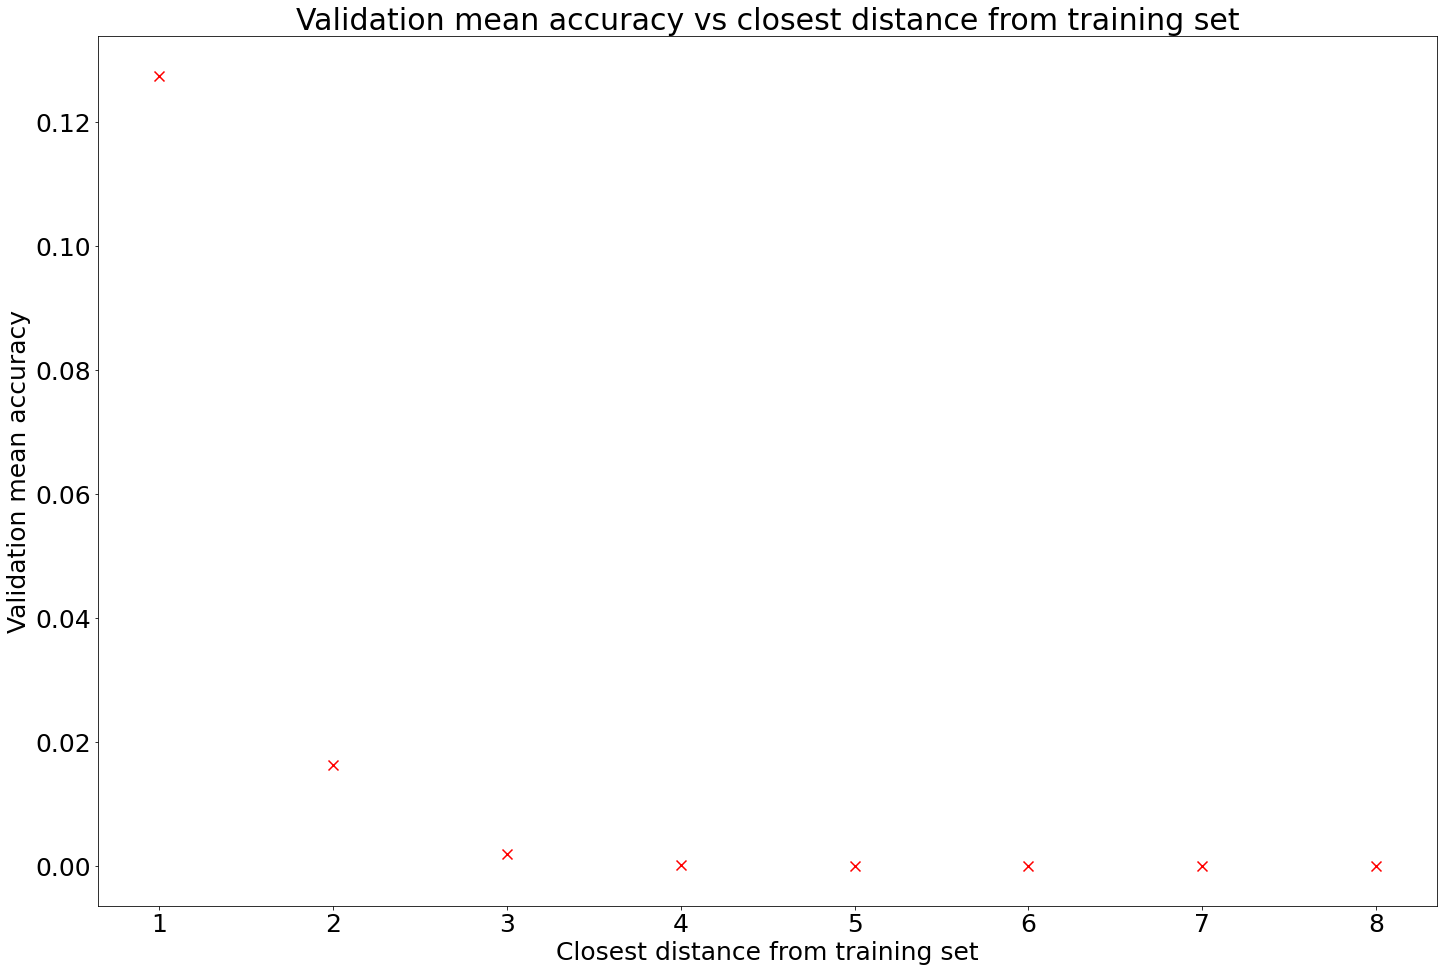

In [56]:
# plot mean accuracy vs dist graph 
min_dist = np.min(closest_dist)
max_dist = np.max(closest_dist)

acc_list = [[] for i in range(min_dist, max_dist + 1)]
for dist, prediction, truth in zip(closest_dist, peptide_pred[:, 1], validation_array[:, 1]):
	if prediction == truth:
		acc_list[dist - min_dist].append(1)
	else:
		acc_list[dist - min_dist].append(0)

mean_acc_list = []
for i, acc in enumerate(acc_list):
    mean_acc_list.append(np.mean(acc))
    print("Number of sequences with closet dist {}: ".format(range(min_dist, max_dist + 1)[i]), len(acc))
    
plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
plt.scatter(range(min_dist, max_dist + 1), mean_acc_list, c='r', s=100, marker = "x")
plt.xlabel('Closest distance from training set')
plt.ylabel('Validation mean accuracy')
plt.title('Validation mean accuracy vs closest distance from training set')
plt.savefig('model_evaluation/mean_acc_vs_dist_scatter_plot.png')
plt.show()

Number of sequences with closet dist 1:  155847
Number of sequences with closet dist 2:  43570
Number of sequences with closet dist 3:  26128
Number of sequences with closet dist 4:  20047
Number of sequences with closet dist 5:  23021
Number of sequences with closet dist 6:  30120
Number of sequences with closet dist 7:  8223
Number of sequences with closet dist 8:  127


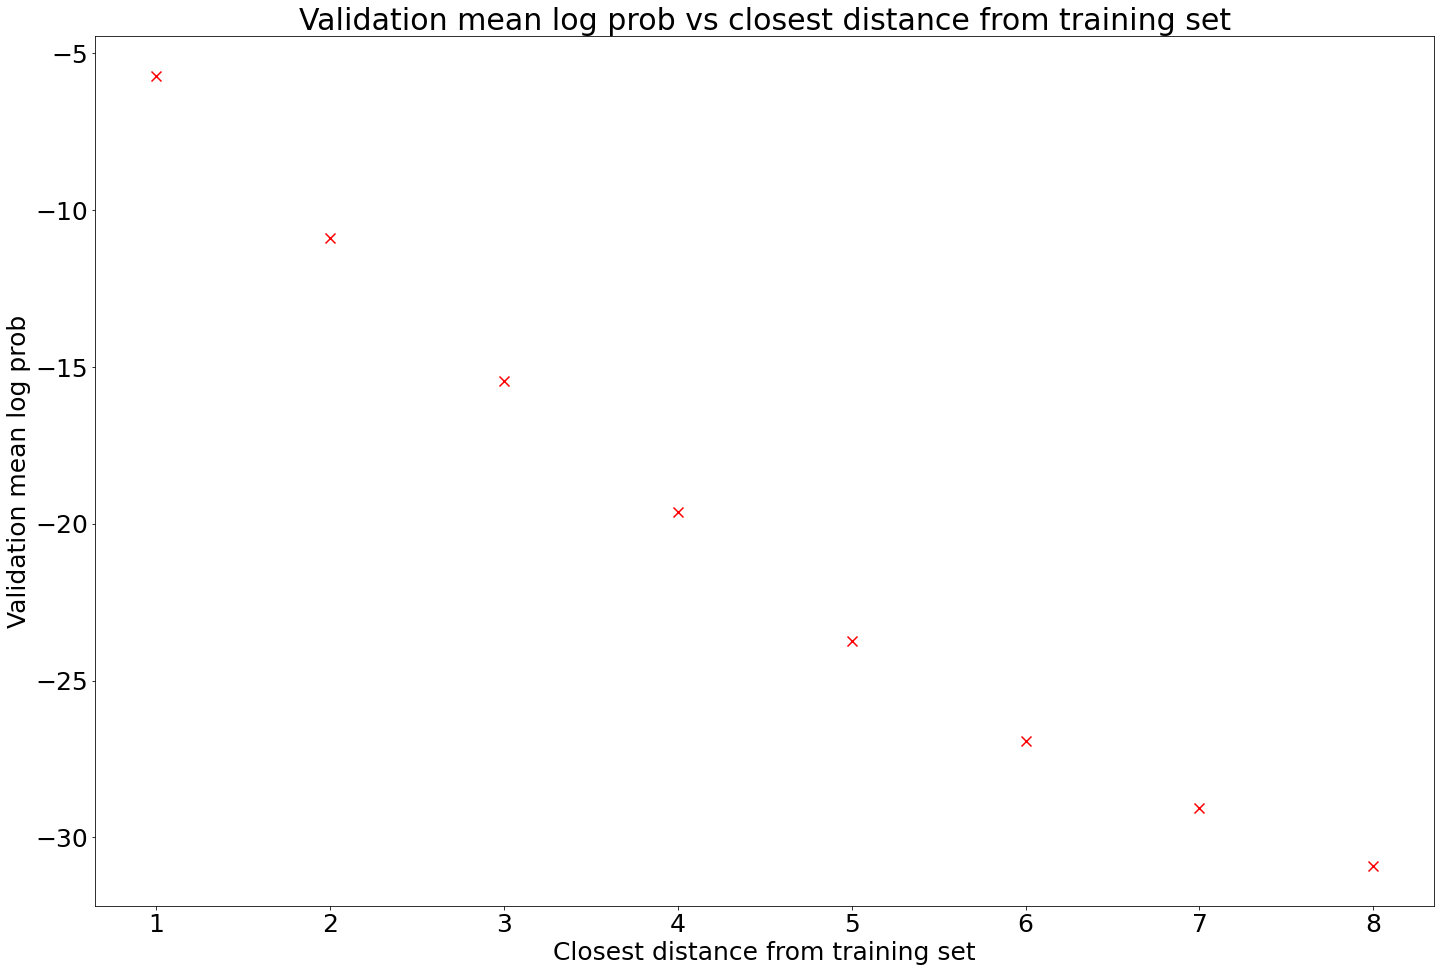

In [57]:
# plot mean log prob vs dist graph 
min_dist = np.min(closest_dist)
max_dist = np.max(closest_dist)

prob_list = [[] for i in range(min_dist, max_dist + 1)]
peptide_eval_prob = peptide_eval[:, 2].astype(np.float64)
for dist, prob in zip(closest_dist, peptide_eval_prob):
	prob_list[dist - min_dist].append(prob)

mean_prob_list = [np.mean(np.log(prob)) for prob in prob_list]
for i, prob in enumerate(prob_list):
	print("Number of sequences with closet dist {}: ".format(range(min_dist, max_dist + 1)[i]), len(prob))

plt.figure(figsize=(24, 16), facecolor=(1, 1, 1))
plt.rcParams.update({'font.size': 25})
plt.scatter(range(min_dist, max_dist + 1), mean_prob_list, c='r', s=100, marker = "x")
plt.xlabel('Closest distance from training set')
plt.ylabel('Validation mean log prob')
plt.title('Validation mean log prob vs closest distance from training set')
plt.savefig('model_evaluation/mean_log_prob_vs_dist_scatter_plot.png')
plt.show()

# Task 6: Frequency check - use script "model_evaluate_frequency_check"